In [121]:
import pandas as pd 
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [122]:
df=pd.read_csv('advertising.csv')

In [123]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [124]:
df.shape

(200, 4)

In [125]:
df.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [127]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [128]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

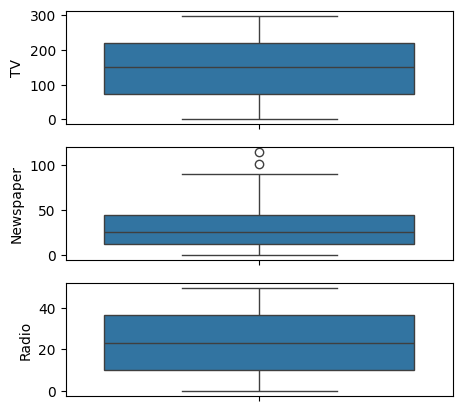

In [130]:
fig,axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(df['TV'], ax =axs[0])
plt2 = sns.boxplot(df['Newspaper'],ax=axs[1])
plt3 = sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout

<Axes: xlabel='Newspaper', ylabel='Density'>

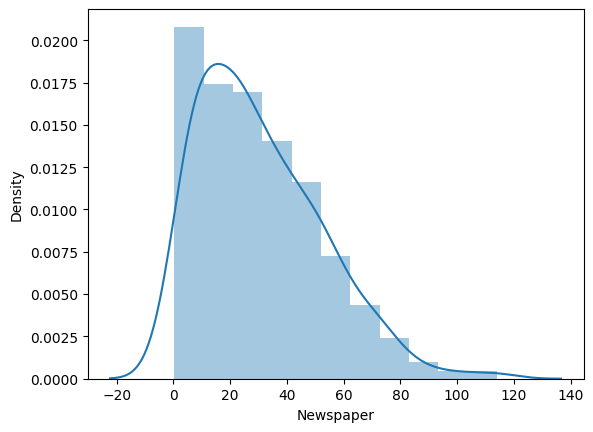

In [131]:
sns.distplot(df['Newspaper'])

In [132]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [133]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [134]:
data = df.copy()

In [135]:
data.loc[data['Newspaper']>93,'Newspaper']=93

<Axes: ylabel='Newspaper'>

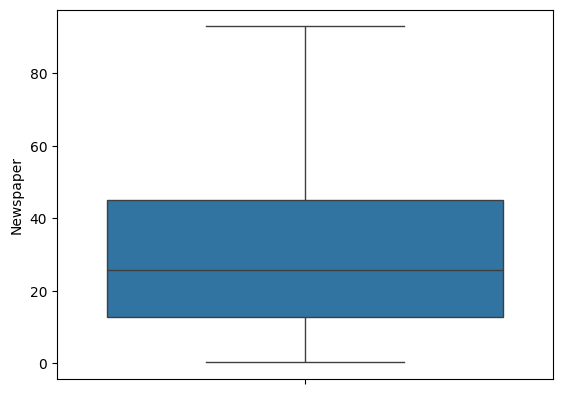

In [136]:
sns.boxplot(data['Newspaper'])

<Axes: ylabel='Sales'>

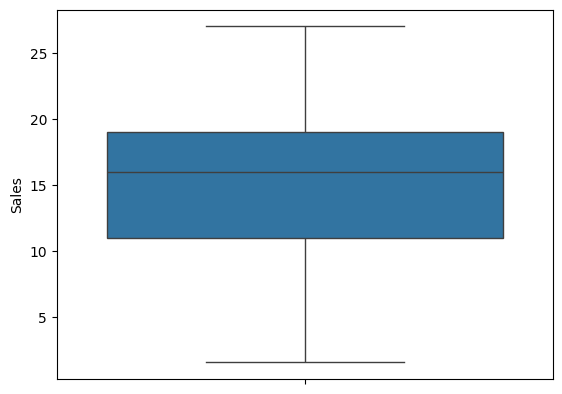

In [137]:
sns.boxplot(data['Sales'])

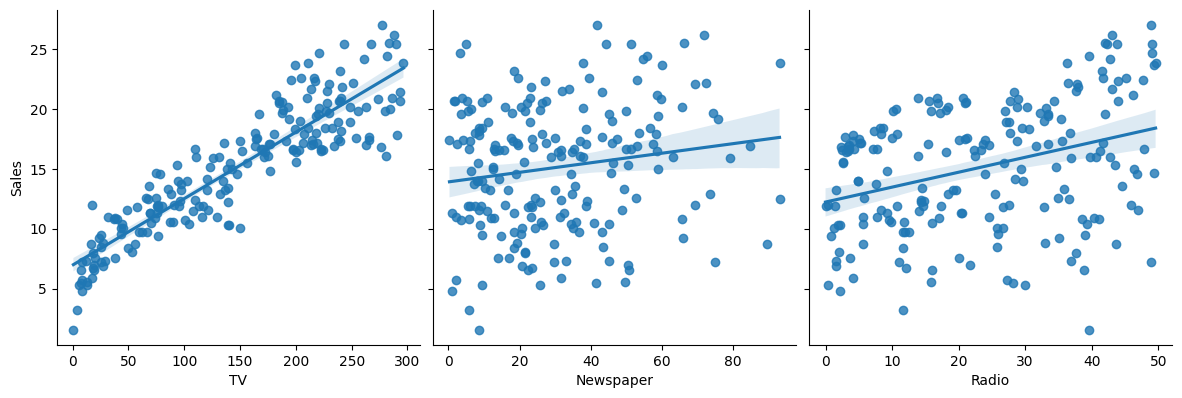

In [138]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4,aspect=1,kind='reg')
plt.show()

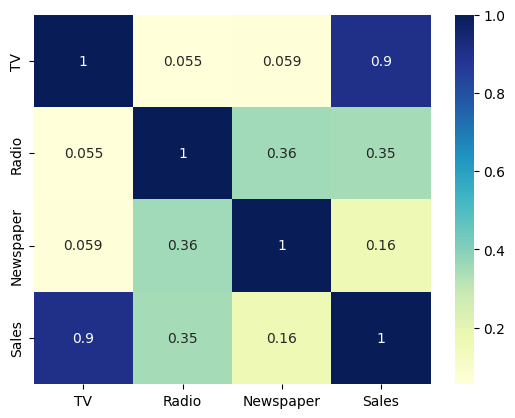

In [139]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [140]:
important_feature = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index) 

In [141]:
print(important_feature)

['TV', 'Sales']


In [142]:
X = data['TV']
y = data['Sales']

In [143]:
X = X.values.reshape(-1,1)


In [144]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [145]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [146]:
print(X.shape,y.shape)

(200, 1) (200,)


In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test_test,y_train,y_test = train_test_split(X,y, test_size =0.33)

In [148]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [149]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error

In [150]:
knn = KNeighborsRegressor().fit(X_train,y_train)
knn

KNeighborsRegressor()

In [151]:
knn_train_pred = knn.predict(X_train)

In [152]:
knn_test_pred = knn.predict(X_test_test)


In [153]:
print(knn_test_pred,knn_train_pred)

[16.28  9.94 13.26 20.78  5.46 16.3  13.7  23.54 18.38 14.06 19.74 20.08
 12.62 12.78 22.2  13.7  16.3  12.78 13.56 18.92 20.74 13.3  13.46 13.6
 13.82 12.78  5.46 20.42  6.96 13.16 13.28 10.38 11.   16.62  9.94 13.06
  6.94 12.62 16.3  20.14 23.56 10.52 19.86 19.84 21.   14.22 18.34 19.88
  7.18 16.66 10.76 10.14 10.52 12.78 21.   23.56 14.06  9.92 19.58  6.28
 18.36 11.   13.3  22.88 22.2  13.82] [19.14 21.9  18.34 14.22 14.22 14.22 12.36 23.4  22.2  18.92 14.66 19.46
  8.64 20.08 20.42 14.46 19.04  6.3   8.7   9.94 19.34  6.96 13.28 19.26
 19.02 16.3  19.64 16.28 19.74 19.64 16.66 10.52 13.82 16.62 19.84 12.36
 11.96 12.78 22.88 20.78  7.18 19.94 12.78  5.46  8.2  22.2  12.78  8.96
 19.54 23.56 20.14 16.66  6.96  8.64 20.96 12.62 12.94 20.78 24.62 21.9
 19.9  23.54 10.38 18.34  6.28 13.7  20.14  8.64 14.06 20.74  7.18 22.06
 18.34 21.   18.92 12.78  5.46 20.32 12.78 19.64 21.   10.76 18.92 14.76
  7.18 10.76 20.2   9.94 23.4  22.2   6.96 20.08 13.7  19.86  5.46 18.34
 20.96 13.7  16

In [154]:
Results = pd.DataFrame(columns=['Model','Train R2','Test R2','Test RMSE','Variance'])

In [155]:
r2 =r2_score(y_test,knn_test_pred)
r2_train =r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
New_result = pd.DataFrame([{'Model': 'K-Nearest Neighbors', 'Train R2': r2_train, 'Test R2': r2, 'Test RMSE': rmse, 'Variance': variance}])

# Append the new results to the existing DataFrame using concat
Results = pd.concat([Results, New_result], ignore_index=True)

# Print the results
print('R2:', r2)
print('RMSE:', rmse)

R2: 0.7279472059628825
RMSE: 2.4706335833203403


In [156]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.870811,0.727947,2.470634,0.142864


In [157]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [158]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test_test)

In [159]:
print(svr_train_pred,svr_test_pred)

[18.07454337 20.36261476 18.40788834 14.29052611 14.41115475 14.37955174
 12.6726474  20.57230493 20.35503794 19.61524812 14.54926045 19.05320497
  8.39574658 19.85100295 17.57151967 14.597522   19.5300917   7.94745239
  8.56199252  9.45595629 19.52098184  8.17996629 12.5780703  17.94897757
 18.20458342 16.22768277 17.7857151  16.99972927 19.25511051 17.7491853
 16.72465266  9.00173217 14.87569148 16.54374693 19.19053784 12.65695166
 11.30515206 11.59629173 20.71362302 20.48951121  8.09832645 19.33797041
 11.48819228  7.87292976  8.50943856 20.45776394 11.43365059  8.70742388
 18.3329199  20.62017761 19.91010445 17.08096627  8.14827383  8.42228105
 20.27473018 12.11646865 12.48247499 20.49817362 20.70013522 20.32120286
 19.35720054 20.67526169 10.42680476 18.45939064  7.88765145 13.2991739
 19.93324775  8.40013522 15.27096295 20.25061695  8.12118311 20.5061886
 18.41936202 20.69685118 19.61524812 12.82310275  7.82837885 19.43308248
 11.38489981 17.75527945 20.68510837 10.84648527 18.70

In [160]:
r2 =r2_score(y_test,svr_test_pred)
r2_train =r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
New_result = pd.DataFrame([{'Model': 'Support Vector Machine', 'Train R2': r2_train, 'Test R2': r2, 'Test RMSE': rmse, 'Variance': variance}])

# Append the new results to the existing DataFrame using concat
Results = pd.concat([Results, New_result], ignore_index=True)

# Print the results
print('R2:', r2)
print('RMSE:', rmse)

R2: 0.7659560998444079
RMSE: 2.2915556504038483


In [161]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.870811,0.727947,2.470634,0.142864
1,Support Vector Machine,0.825774,0.765956,2.291556,0.059818


In [162]:
import statsmodels.api as sm

In [163]:
X_train_constant =sm.add_constant(X_train)

In [164]:
model = sm.OLS(y_train,X_train_constant).fit()

In [165]:
model.params

const    6.846325
x1       0.057970
dtype: float64

In [166]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     688.1
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           3.32e-54
Time:                        18:53:01   Log-Likelihood:                -295.53
No. Observations:                 134   AIC:                             595.1
Df Residuals:                     132   BIC:                             600.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8463      0.382     17.926      0.0

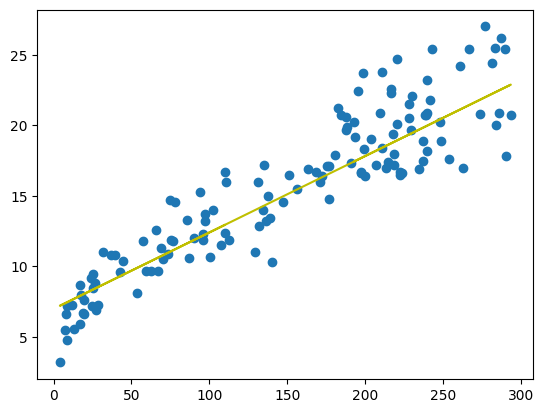

In [167]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9955 + 0.0541 * X_train,'y')
plt.show()

In [168]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

85     2.153874
147    4.455374
55     5.323445
73    -3.347641
159   -1.580972
         ...   
72     0.400079
184   -3.959108
58     4.733602
57    -1.541837
71    -0.811430
Name: Sales, Length: 134, dtype: float64

In [169]:
y_train_pred

array([18.04612647, 20.94462572, 18.37655538, 14.34764141, 14.48097238,
       14.44619039, 12.49839888, 23.32719212, 23.86631298, 19.73885003,
       14.63169434, 19.06060121,  8.29557496, 20.06348195, 17.56497559,
       14.68386733, 19.62870706,  7.52457416,  8.50426691,  9.42598967,
       19.61711306,  7.98253704, 12.39405291, 17.9243895 , 18.17366043,
       16.31282391, 17.76787054, 17.03165173, 19.29248115, 17.73308855,
       16.77658379,  8.98541778, 14.97951425, 16.60847083, 19.21712017,
       12.48100789, 11.10132224, 11.37957817, 22.31851437, 21.24606965,
        7.84340908, 19.39103012, 11.2752322 ,  7.29849121,  8.44049992,
       23.64023004, 11.22305921,  8.67237986, 18.3011944 , 23.15907916,
       20.15043693, 17.10701271,  7.93036405,  8.33035695, 20.76491877,
       11.90130804, 12.28970694, 21.26925764, 22.71271027, 20.85767075,
       19.41421812, 22.89821422, 10.30133645, 18.42872837,  7.3506642 ,
       13.2114297 , 20.18521892,  8.30137196, 15.38530415, 20.71

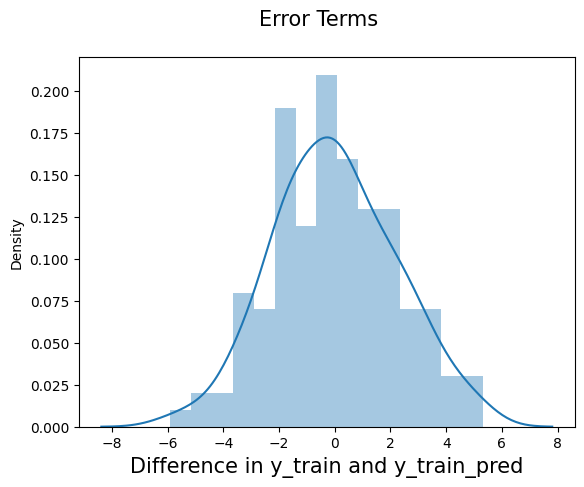

In [170]:
fig = plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()

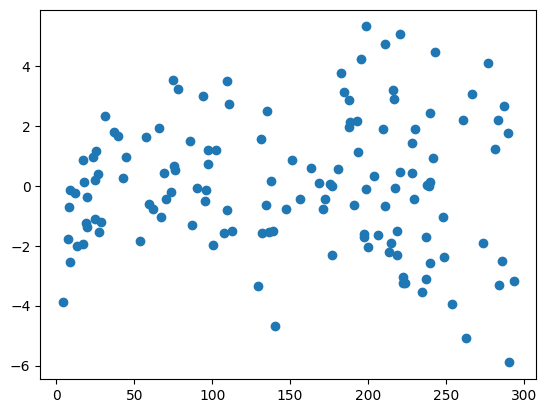

In [171]:
plt.scatter(X_train,res)
plt.show()

In [172]:
X_train_constant = sm.add_constant(X_test_test)
y_pred = model.predict(X_train_constant)

In [173]:
y_pred

array([16.99686973,  9.43758367, 11.49551814, 21.39099461,  7.15936325,
       16.44615488, 13.57084361, 22.88662023, 18.73017229, 15.53022911,
       19.33306014, 20.01710596, 12.046233  , 11.2752322 , 23.82573399,
       13.64040759, 16.32441791, 11.21146521, 13.86069354, 18.58524733,
       20.74752777, 15.03748424, 13.83170854, 13.81431755, 14.91574727,
       11.19987122,  6.88690432, 17.56497559,  7.93616105, 13.98243051,
       12.30709793, 10.1042385 , 10.84625431, 16.51571886,  9.34483169,
       12.90998578,  7.60573214, 11.96507502, 16.38238789, 20.30115889,
       23.08951518,  9.06077876, 18.84031526, 19.22291716, 22.07504044,
       14.13315247, 18.42872837, 19.58812807,  7.84340908, 16.71281681,
       10.77669033,  9.64627561,  9.04918477, 11.2694352 , 22.2199654 ,
       23.11850017, 15.52443211,  9.74482459, 21.65185954,  7.33327321,
       19.93594798, 10.81147232, 15.13023621, 22.24315339, 24.02862894,
       14.93313826])

In [174]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [175]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(2.5173832955977504)

In [176]:
r2 = r2_score(y_test,y_pred)
r2

0.7175541475944592

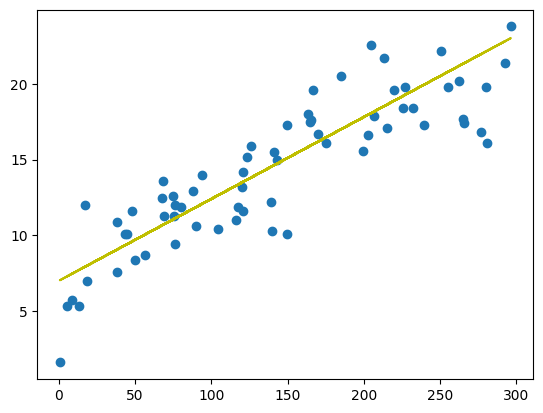

In [177]:
plt.scatter(X_test_test,y_test)
plt.plot(X_test_test, 6.9955 + 0.0541 * X_test_test, 'y')
plt.show()